In [84]:
import pandas as pd
import numpy as np
import importlib
import os
import matplotlib.pyplot as plt

import helper_functions as hf
import simulation_functions as sf
import scenario_analysis as sa
importlib.reload(sf)
importlib.reload(hf)
importlib.reload(sa)

from helper_functions import create_risk_return_plot, get_excel_sheet_names
from helper_functions import data_for_plotting

from simulation_functions import calculate_instrument_correlations, simulate_portfolio, plot_simulated_portfolio

from scenario_analysis import run_scenario, plot_scenario_analysis

In [80]:
file_path = 'fund.xlsx'
sheet_names = get_excel_sheet_names(file_path)
print(sheet_names)
data = pd.read_excel(file_path, sheet_name='fund_assets')
data.set_index('Strategy', inplace=True, drop=False)
data.drop('Summary', axis=0, inplace=True)
factor_corr = pd.read_excel(file_path, sheet_name='Factor_Correlation')
factor_corr.set_index('Unnamed: 0', inplace=True)

['fund_assets', 'Links', 'long_only_pms', 'Factor_Correlation']


Creating original Amunra Advisors plot...


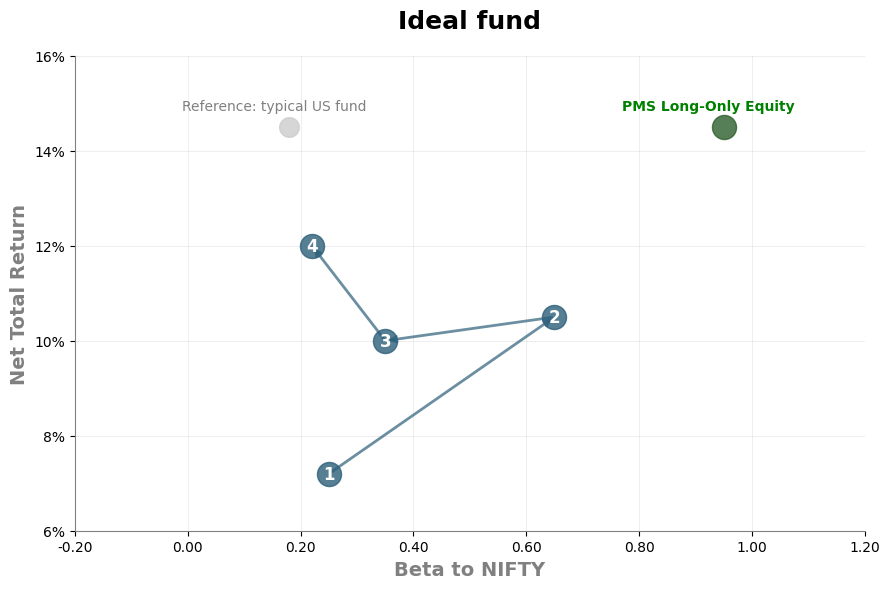

Creating plot own research...


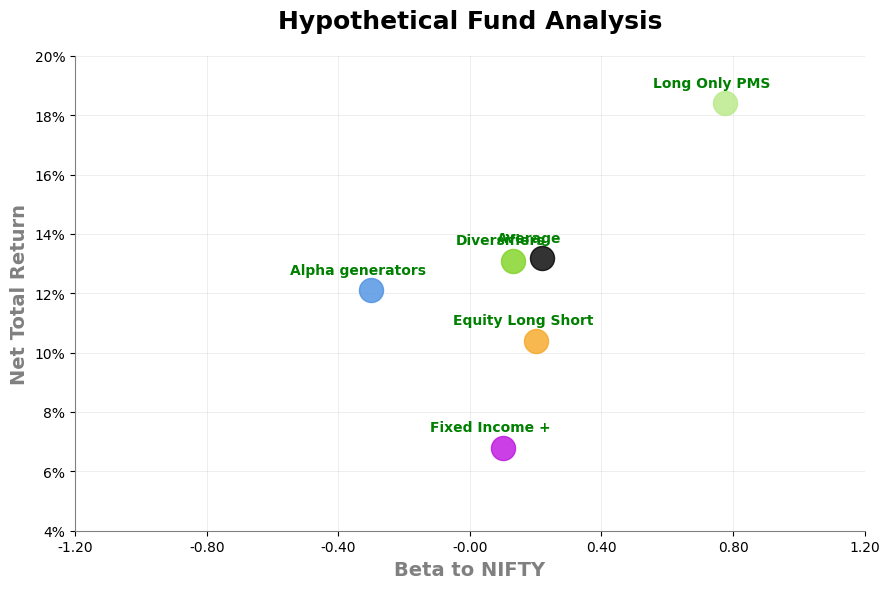

In [81]:
# Example 1: Original plot
print("Creating original Amunra Advisors plot...")
fig1, ax1 = create_risk_return_plot(title="Ideal fund")

# Example 2: Custom data with different styling
print("Creating plot own research...")
df = data.reset_index(level='Strategy', drop=True)
plot_data = data_for_plotting(df)

fig2, ax2 = create_risk_return_plot(
    data_points=plot_data,
    title="Hypothetical Fund Analysis",
    show_arrows=False,
)

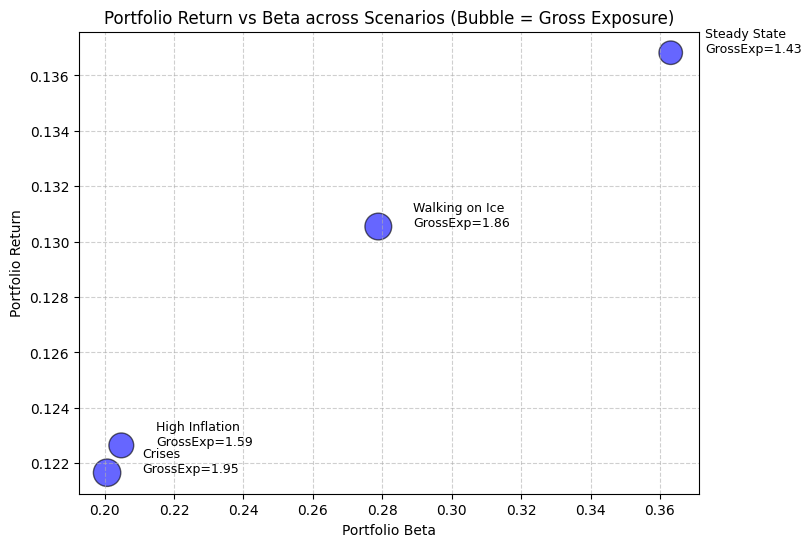

         Scenario    Return     Beta  Gross_exp
0    Steady State  0.136822  0.36310      1.430
1          Crises  0.121660  0.20070      1.945
2  High Inflation  0.122647  0.20480      1.595
3  Walking on Ice  0.130547  0.27885      1.855


In [82]:
# Define scenarios
scenarios = {
    "Steady State": {"Fixed Income +": 0.1, "Equity Long Short": 0.3, "Long Only PMS": 0.4, "Diversifiers": 0.1, "Alpha generators": 0.1},
    "Crises": {"Fixed Income +": 0.2, "Equity Long Short": 0.2, "Long Only PMS": 0.2, "Diversifiers": 0.2, "Alpha generators": 0.2},
    "High Inflation": {"Fixed Income +": 0.2, "Equity Long Short": 0.2, "Long Only PMS": 0.2, "Diversifiers": 0.3, "Alpha generators": 0.1},
    "Walking on Ice": {"Fixed Income +": 0.1, "Equity Long Short": 0.3, "Long Only PMS": 0.3, "Diversifiers": 0.1, "Alpha generators": 0.2},
}

# Beta adjustments (per strategy, per scenario)
beta_adjustments = {
    "Steady State": {"Equity Long Short": 1.0, "Long Only PMS": 1.0, "Diversifiers": 1.0, "Fixed Income +": 1.0, "Alpha generators": 1.0},
    "Crises": {"Equity Long Short": 1.1, "Long Only PMS": 1.1},
    "High Inflation": {"Equity Long Short": 0.9, "Long Only PMS": 0.9},
    "Walking on Ice": {"Equity Long Short": 1.0, "Long Only PMS": 1.1},
}

# Run the function
results_df = plot_scenario_analysis(data, scenarios, beta_adjustments)
print(results_df)

Diversifiers 0.1
PMS -0.2


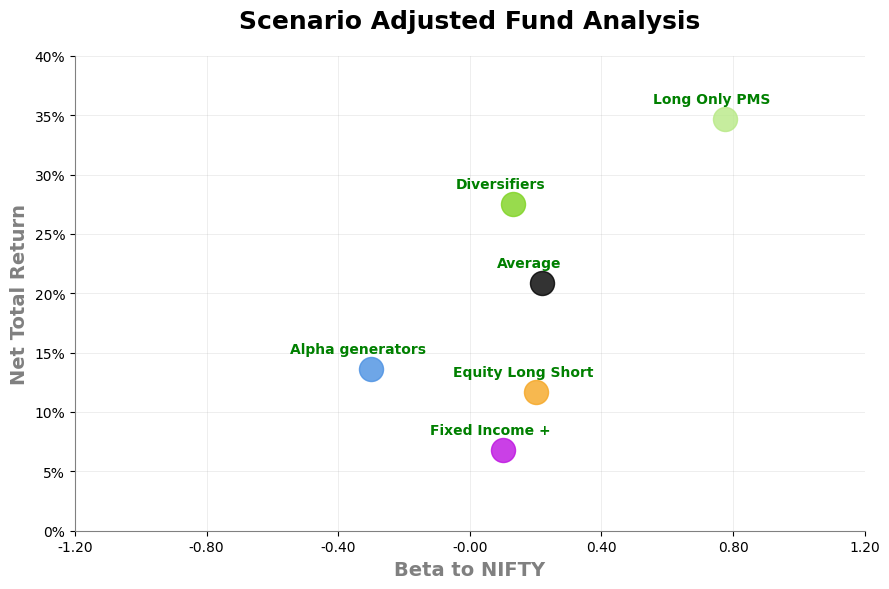


Fund-level Results (Scenario Applied):
                           Fund name  Return_post  Scenario_Return
Strategy                                                         
Fixed Income +               Fund 1     0.072000         0.072000
Fixed Income +               Fund 2     0.064800         0.064800
Equity Long Short         AlphaGrep     0.093600         0.108600
Equity Long Short        TrueBeacon     0.115200         0.125200
Long Only PMS             MO_MidCap     0.204549         0.378188
Long Only PMS      Invesco_smallCap     0.212684         0.397831
Long Only PMS        Quant_smallcap     0.172469         0.330445
Long Only PMS           ICICI_infra     0.145128         0.281231
Diversifiers                   Gold     0.147000         0.308700
Diversifiers            Real estate     0.114660         0.240786
Alpha generators        Deriv_strat     0.120960         0.135960

Portfolio Return (Scenario): 0.208771394307
Portfolio Volatility (approx): 0.1140825


In [ ]:
# Prepare data for scenario analysis
required_columns = ['Strategy', 'Fund name', 'Return_post', 'Std Dev', 'Net_exp', 'Value', 'Momentum', 'Quality', 'Risk', 'Technical']
df = data[required_columns].copy()
df.columns = ['Strategy', 'Fund name','Return_post', 'Std Dev', 'Weight', 'Value', 'Momentum', 'Quality', 'Risk', 'Technical']

# Define scenario
factor_shocks = {"Momentum": 0.01}   # Momentum -5%
asset_shocks = {"Diversifiers": 0.10, "PMS": -0.20}  # PMS down 20%, Gold +10%

# Run Scenario
results = run_scenario(df, factor_shocks, asset_shocks)

# Step 1: Replace Return_post with Scenario Returns
df_updated = data.copy()
df_updated.loc[:, "Return_post"] = results["fund_results"]["Scenario_Return"].values

# Step 2: Prepare Data for Plotting
df_updated = df_updated.reset_index(level="Strategy", drop=True)
plot_data = data_for_plotting(df_updated)

# Step 3: Create Risk-Return Plot
fig2, ax2 = create_risk_return_plot(
    data_points=plot_data,
    title="Scenario Adjusted Fund Analysis",
    show_arrows=False,
)

# Step 4: Print Results
print("\nFund-level Results (Scenario Applied):\n", results["fund_results"])
print("\nPortfolio Return (Scenario):", results["portfolio_return"])
print("Portfolio Volatility (approx):", results["portfolio_volatility"])

In [57]:
factor_names = factor_corr.columns.tolist()
factor_beta = data[factor_names].T

instrument_corr = calculate_instrument_correlations(factor_corr, factor_beta)
instrument_corr

Strategy,Fixed Income +,Fixed Income +,Equity Long Short,Equity Long Short,Long Only PMS,Long Only PMS,Long Only PMS,Long Only PMS,Diversifiers,Diversifiers,Alpha generators
Strategy,,,,,,,,,,,
Fixed Income +,1.000,0.909,0.211,0.530,0.577,0.461,0.398,0.398,0.248,0.248,-0.015
Fixed Income +,0.909,1.000,0.410,0.677,0.804,0.685,0.613,0.613,-0.174,-0.174,0.083
Equity Long Short,0.211,0.410,1.000,0.926,0.749,0.852,0.934,0.934,-0.434,-0.434,0.896
Equity Long Short,0.530,0.677,0.926,1.000,0.899,0.946,0.974,0.974,-0.328,-0.328,0.712
Long Only PMS,0.577,0.804,0.749,0.899,1.000,0.977,0.929,0.929,-0.536,-0.536,0.387
Long Only PMS,0.461,0.685,0.852,0.946,0.977,1.000,0.982,0.982,-0.534,-0.534,0.540
Long Only PMS,0.398,0.613,0.934,0.974,0.929,0.982,1.000,1.000,-0.498,-0.498,0.689
Long Only PMS,0.398,0.613,0.934,0.974,0.929,0.982,1.000,1.000,-0.498,-0.498,0.689
Diversifiers,0.248,-0.174,-0.434,-0.328,-0.536,-0.534,-0.498,-0.498,1.000,1.000,-0.175


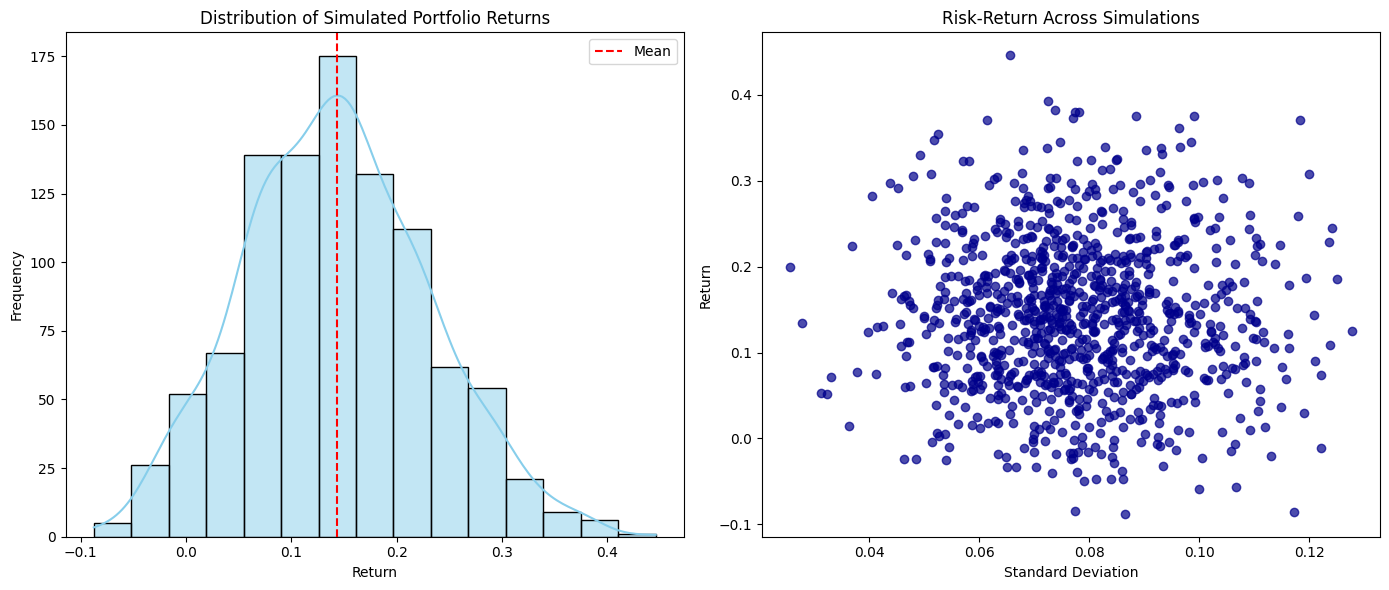

Average Portfolio Return: 0.14298366162398293
Average Portfolio StdDev: 0.07800514113386592


,Simulated_Return,Simulated_StdDev
0,0.100921,0.062579
1,0.158648,0.057712
2,0.129206,0.041472
3,0.232305,0.087243
4,0.086066,0.084186
...,...,...
995,0.159765,0.058112
996,0.078746,0.063590
997,-0.040325,0.073252
998,0.048760,0.084444


In [58]:
mu = data["Return_post"]
sigma = data["Std Dev"]
corr_matrix = instrument_corr
weights = data["Net_exp"]
returns = simulate_portfolio(mu, sigma, corr_matrix, weights, n_scenarios=1000)
plot_simulated_portfolio(returns)

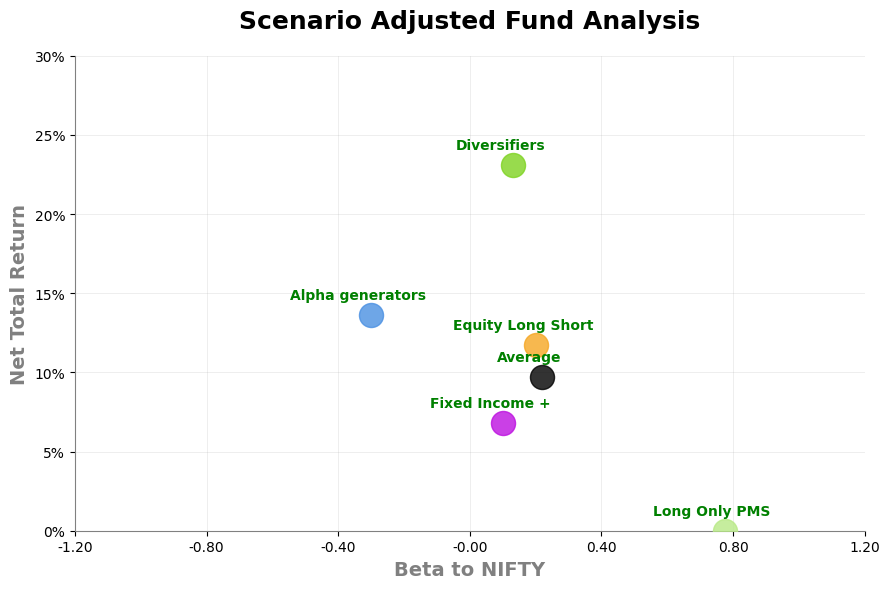


Fund-level Results (Scenario Applied):
                           Fund name  Return_post  Scenario_Return
Strategy                                                         
Fixed Income +               Fund 1     0.072000         0.072000
Fixed Income +               Fund 2     0.064800         0.064800
Equity Long Short         AlphaGrep     0.093600         0.108600
Equity Long Short        TrueBeacon     0.115200         0.125200
Long Only PMS             MO_MidCap     0.204549         0.014549
Long Only PMS      Invesco_smallCap     0.212684         0.027684
Long Only PMS        Quant_smallcap     0.172469        -0.007531
Long Only PMS           ICICI_infra     0.145128        -0.034872
Diversifiers                   Gold     0.147000         0.247000
Diversifiers            Real estate     0.114660         0.214660
Alpha generators        Deriv_strat     0.120960         0.135960

Portfolio Return (Scenario): 0.097205274615
Portfolio Volatility (approx): 0.1140825
